In [1]:
import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Show/Hide code</button>''', raw=True)

Show/Hide code

In [2]:
#Allow the created content to be interactivelly ploted inline
%matplotlib inline
#Establish width and height for all plots in the report
#pylab.rcParams['figure.figsize'] = (18, 6) #width, height

In [3]:
#Import needed libraries
import os
from os.path import join, getsize
import pandas as pd
from cycler import cycler
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import collections
import matplotlib as mpl
inline_rc = dict(mpl.rcParams)
#the next cell enables plotting tables without borders

In [4]:
%%html
<style>
table,td,tr,th {border:none!important}
</style>

![](https://co2mpas.io/_images/CO2MPAS_banner.png)

# Summary report of the CO2MPAS WLTP to NEDC CO$_2$ emission simulation model: 31 real cars

[Visit the CO2MPAS home page](http://co2mpas.io)

Complete path to the CO2MPAS summary file used in this report:

In [5]:
#Specify the output folder and file containing the CO2MPAS summary output file.
folder = r'D:\co2mpas-version-trials\co2mpas-panino-v122'
file = '20160707_123421-summaryNames.xlsx'
infile = join(folder, file)
df=pd.read_excel(infile, 'summary', header=[0, 1, 2], index_col=[0], skiprows=[3])
print(infile)

D:\co2mpas-version-trials\co2mpas-panino-v122\20160707_123421-summaryNames.xlsx


In [6]:
#Gather and name the basic variables used in the report according to their name in the CO2MPAS output file
NEDC = df['nedc']['prediction']['co2_emission value']
NEDCt = df['nedc']['target']['co2_emission value']
UDC = df['nedc']['prediction']['co2_emission UDC']
UDCt = df['nedc']['target']['co2_emission UDC']
EUDC = df['nedc']['prediction']['co2_emission EUDC']
EUDCt = df['nedc']['target']['co2_emission EUDC']
#Obtain the case number and vehicle model from the input file
df['vehicle'] = df.index
model = df['vehicle'].str.split('_test').str[0]
#Create a dataframe with this data
valuesDF = pd.DataFrame({'NEDC': NEDC,'NEDCt':NEDCt, 'dNEDC':NEDC-NEDCt,'UDC': UDC,'UDCt':UDCt, 'dUDC':UDC-UDCt,'EUDC': EUDC,'EUDCt':EUDCt, 'dEUDC':EUDC-EUDCt,'Model':model})     
#calculate percentages
valuesDF['NEDC error [%]'] = pd.Series((valuesDF.dNEDC/valuesDF.NEDCt*100), index=valuesDF.index)
valuesDF['UDC error [%]'] = pd.Series((valuesDF.dUDC/valuesDF.UDCt*100), index=valuesDF.index)
valuesDF['EUDC error [%]'] = pd.Series((valuesDF.dEUDC/valuesDF.EUDCt*100), index=valuesDF.index)
valuesDF = valuesDF.dropna()

## Section 1. Performance of the model. All vehicles and test cases.

### Error statistics for CO$_2$ emission per driving cycle

Error statistics for **NEDC**, **UDC**, and **EUDC** CO$_2$ emission

In [7]:
#Create a dataframe with the NECD, UDC, EUDC error statistics
errorsDF = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['NEDC [gCO$_2$ km$^{-1}$]','UDC [gCO$_2$ km$^{-1}$]', 'EUDC [gCO$_2$ km$^{-1}$]'])
errorsDF.loc['Averages'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.mean(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.mean(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.mean(),2)})
errorsDF.loc['StdError'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.sem(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.sem(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.sem(),2)})
errorsDF.loc['Median'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.median(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.median(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.median(),2)})
#errorsDF.loc['Mode'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.mode().iloc[0],2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.mode().iloc[0],2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.mode().iloc[0],2)})
errorsDF.loc['StdDev'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.std(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.std(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.std(),2)})
errorsDF.loc['Variance'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.var(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.var(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.var(),2)})
errorsDF.loc['Kurtosis'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.kurtosis(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.kurtosis(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.kurtosis(),2)})
errorsDF.loc['Skweness'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.skew(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.skew(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.skew(),2)})
errorsDF.loc['Range'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dNEDC.max()-valuesDF.dNEDC.min()),2), 'UDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dUDC.max()-valuesDF.dUDC.min()),2), 'EUDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dEUDC.max()-valuesDF.dEUDC.min()),2)})
errorsDF.loc['Minimum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.min(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.min(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.min(),2)})
errorsDF.loc['Maximum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.max(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.max(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.max(),2)})
errorsDF.loc['Sum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.sum(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.sum(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.sum(),2)})
errorsDF.loc['Count'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dNEDC.count(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dUDC.count(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(valuesDF.dEUDC.count(),2)})
errorsDF.loc['Confidence level (95%)'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':2*round(valuesDF.dNEDC.sem(),2), 'UDC [gCO$_2$ km$^{-1}$]':2*round(valuesDF.dUDC.sem(),2), 'EUDC [gCO$_2$ km$^{-1}$]':2*round(valuesDF.dEUDC.sem(),2)})
errorsDF

,NEDC [gCO$_2$ km$^{-1}$],UDC [gCO$_2$ km$^{-1}$],EUDC [gCO$_2$ km$^{-1}$]
Averages,-0.26,-1.94,0.93
StdError,0.8,1.54,0.72
Median,0.2,-0.08,0.68
Mode,NaN,NaN,NaN
StdDev,4.47,8.58,4.03
Variance,19.97,73.58,16.24
Kurtosis,-0.45,-0.21,1.76
Skweness,-0.29,-0.39,-0.82
Range,17.72,36.32,18.67
Minimum,-10.66,-22.85,-11.22


In [8]:
#Create a dataframe with the NECD, UDC, EUDC error statistics
errorsDF = pd.DataFrame(index=['Averages','StdDev','Minimum','Maximum','Cases in ±4%','Cases in ±2.5%'], columns=['NEDC [%]','UDC [%]', 'EUDC [%]'])
errorsDF.loc['Averages'] = pd.Series({'NEDC [%]':round(valuesDF['NEDC error [%]'].mean(),2), 'UDC [%]':round(valuesDF['UDC error [%]'].mean(),2), 'EUDC [%]':round(valuesDF['EUDC error [%]'].mean(),2)})
errorsDF.loc['StdDev'] = pd.Series({'NEDC [%]':round(valuesDF['NEDC error [%]'].std(),2), 'UDC [%]':round(valuesDF['UDC error [%]'].std(),2), 'EUDC [%]':round(valuesDF['EUDC error [%]'].std(),2)})
errorsDF.loc['Minimum'] = pd.Series({'NEDC [%]':round(valuesDF['NEDC error [%]'].min(),2), 'UDC [%]':round(valuesDF['UDC error [%]'].min(),2), 'EUDC [%]':round(valuesDF['EUDC error [%]'].min(),2)})
errorsDF.loc['Maximum'] = pd.Series({'NEDC [%]':round(valuesDF['NEDC error [%]'].max(),2), 'UDC [%]':round(valuesDF['UDC error [%]'].max(),2), 'EUDC [%]':round(valuesDF['EUDC error [%]'].max(),2)})
errorsDF.loc['Cases in ±4%'] = pd.Series({'NEDC [%]':round(sum(abs(valuesDF['NEDC error [%]'])<4)/len(valuesDF['NEDC error [%]'])*100,1), 'UDC [%]':round(sum(abs(valuesDF['UDC error [%]'])<4)/len(valuesDF['UDC error [%]'])*100,1), 'EUDC [%]':round(sum(abs(valuesDF['EUDC error [%]'])<4)/len(valuesDF['EUDC error [%]'])*100,1)})
errorsDF.loc['Cases in ±2.5%'] = pd.Series({'NEDC [%]':round(sum(abs(valuesDF['NEDC error [%]'])<2.5)/len(valuesDF['NEDC error [%]'])*100,1), 'UDC [%]':round(sum(abs(valuesDF['UDC error [%]'])<2.5)/len(valuesDF['UDC error [%]'])*100,1), 'EUDC [%]':round(sum(abs(valuesDF['EUDC error [%]'])<2.5)/len(valuesDF['EUDC error [%]'])*100,1)})
errorsDF

,NEDC [%],UDC [%],EUDC [%]
Averages,0.03,-0.84,1.07
StdDev,2.89,4.3,3.04
Minimum,-5.23,-9.42,-5.64
Maximum,5.04,7.1,6.47
Cases in ±4%,83.9,58.1,80.6
Cases in ±2.5%,58.1,38.7,58.1


Error statistics for CO$_2$ emission per driving cycle applying a filtering of NEDC absolute error < 25 gCO$_2$ km$^{-1}$

Removed cases and associated error of CO$_2$ emission for NEDC

In [9]:
#list of filtered cases
fcases = valuesDF[abs(valuesDF.dNEDC) > 25]
fcases2 = pd.DataFrame({'Absolute error gCO$_2$ km$^{-1}$':fcases.dNEDC})
print((len(fcases.dNEDC)),'cases with an absolute NEDC 'u'CO\u2082 emission error above 25 g'u'CO\u2082/km')
fcases2.columns.name='# case'
if (len(fcases.dNEDC)) != 0:
    fcases

0 cases with an absolute NEDC CO₂ emission error above 25 gCO₂/km


Error statistics for **NEDC**, **UDC**, and **EUDC** CO$_2$ emission (filtered)

In [10]:
#Create a dataframe with the FILETERED NECD, UDC, EUDC error statistics
#removing the cases where the absolute error for NEDC is larger than 25gCO2/km
fvaluesDF = valuesDF[abs(valuesDF.dNEDC) < 25]
ferrorsDF = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['NEDC [gCO$_2$ km$^{-1}$]','UDC [gCO$_2$ km$^{-1}$]', 'EUDC [gCO$_2$ km$^{-1}$]'])
ferrorsDF.loc['Averages'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.mean(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.mean(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.mean(),2)})
ferrorsDF.loc['StdError'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.sem(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.sem(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.sem(),2)})
ferrorsDF.loc['Median'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.median(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.median(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.median(),2)})
#ferrorsDF.loc['Mode'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.mode().iloc[0],2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.mode().iloc[0],2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.mode().iloc[0],2)})
ferrorsDF.loc['StdDev'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.std(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.std(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.std(),2)})
ferrorsDF.loc['Variance'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.var(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.var(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.var(),2)})
ferrorsDF.loc['Kurtosis'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.kurtosis(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.kurtosis(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.kurtosis(),2)})
ferrorsDF.loc['Skweness'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.skew(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.skew(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.skew(),2)})
ferrorsDF.loc['Range'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round((fvaluesDF.dNEDC.max()-fvaluesDF.dNEDC.min()),2), 'UDC [gCO$_2$ km$^{-1}$]':round((fvaluesDF.dUDC.max()-fvaluesDF.dUDC.min()),2), 'EUDC [gCO$_2$ km$^{-1}$]':round((valuesDF.dEUDC.max()-valuesDF.dEUDC.min()),2)})
ferrorsDF.loc['Minimum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.min(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.min(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.min(),2)})
ferrorsDF.loc['Maximum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.max(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.max(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.max(),2)})
ferrorsDF.loc['Sum'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.sum(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.sum(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.sum(),2)})
ferrorsDF.loc['Count'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dNEDC.count(),2), 'UDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dUDC.count(),2), 'EUDC [gCO$_2$ km$^{-1}$]':round(fvaluesDF.dEUDC.count(),2)})
ferrorsDF.loc['Confidence level (95%)'] = pd.Series({'NEDC [gCO$_2$ km$^{-1}$]':2*round(fvaluesDF.dNEDC.sem(),2), 'UDC [gCO$_2$ km$^{-1}$]':2*round(fvaluesDF.dUDC.sem(),2), 'EUDC [gCO$_2$ km$^{-1}$]':2*round(fvaluesDF.dEUDC.sem(),2)})
if (len(valuesDF.dNEDC)-len(fvaluesDF.dNEDC)) == 0:
    print('No filtering needed, same statistics as above')
else:
    display(ferrorsDF)

No filtering needed, same statistics as above


Distribution of the **NEDC**, **UDC** and **EUDC** errors for filtered cases

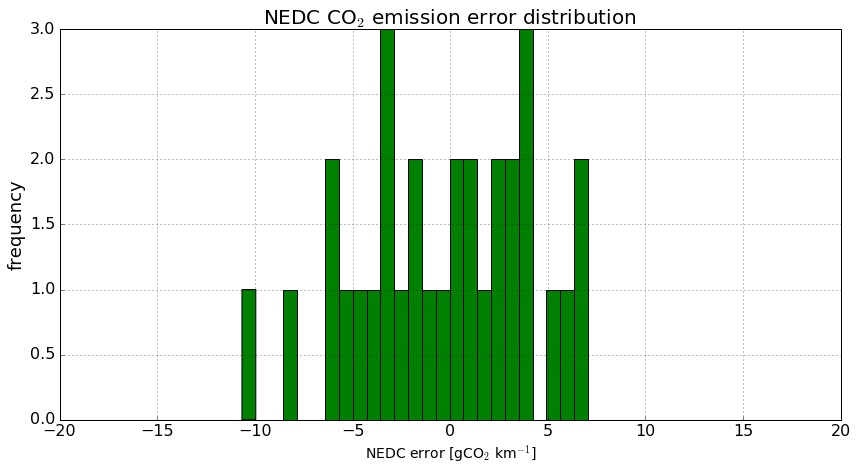

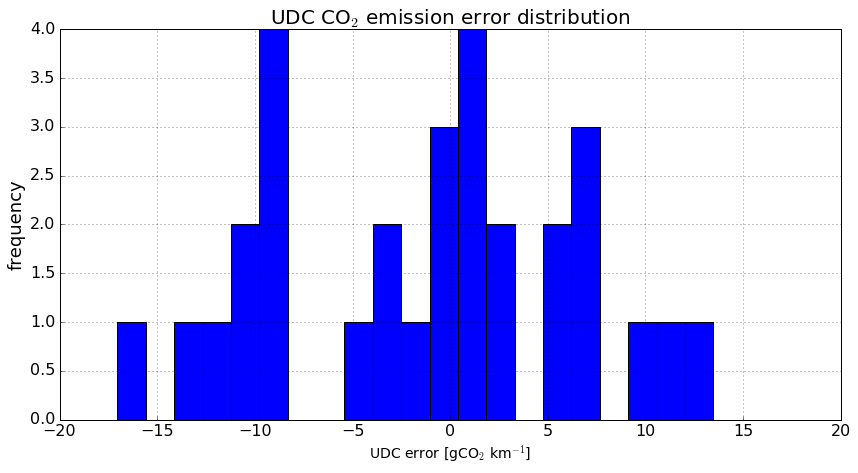

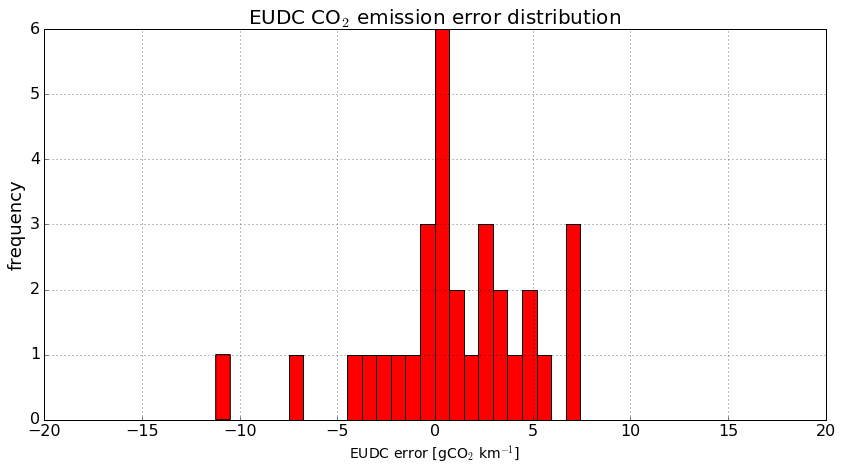

In [11]:
#NEDC
# Create a figure instance
fig = plt.figure(1, figsize=(14, 7))
# Create an axes instance
ax = fig.add_subplot(111)
NEDC_hist = fvaluesDF.dNEDC.hist(bins=25, color='green')
NEDC_hist.set_xlabel("NEDC error [gCO$_2$ km$^{-1}$]",fontsize=14)
NEDC_hist.set_ylabel("frequency",fontsize=14)
plt.title('NEDC CO$_2$ emission error distribution', fontsize=20)
plt.ylabel("frequency",fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(-20, 20)
plt.show()
#UDC
fig = plt.figure(1, figsize=(14, 7))
ax = fig.add_subplot(111)
UDC_hist = fvaluesDF.dUDC.hist(bins=25, color='blue') 
UDC_hist.set_xlabel("UDC error [gCO$_2$ km$^{-1}$]",fontsize=14)
UDC_hist.set_ylabel("frequency",fontsize=14)
plt.title('UDC CO$_2$ emission error distribution', fontsize=20)
plt.ylabel("frequency",fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(-20, 20)
plt.show()
#EUDC
fig = plt.figure(1, figsize=(14, 7))
ax = fig.add_subplot(111)
EUDC_hist = fvaluesDF.dEUDC.hist(bins=25, color='red') 
EUDC_hist.set_xlabel("EUDC error [gCO$_2$ km$^{-1}$]",fontsize=14)
EUDC_hist.set_ylabel("frequency",fontsize=14)
plt.title('EUDC CO$_2$ emission error distribution', fontsize=20)
plt.ylabel("frequency",fontsize=18)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(-20, 20)
plt.show()

Distribution of the **NEDC**, **UDC** and **EUDC** errors [%]

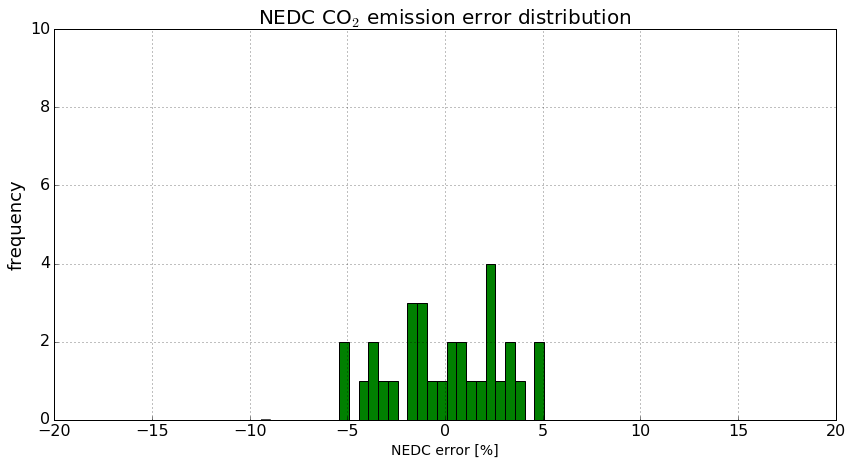

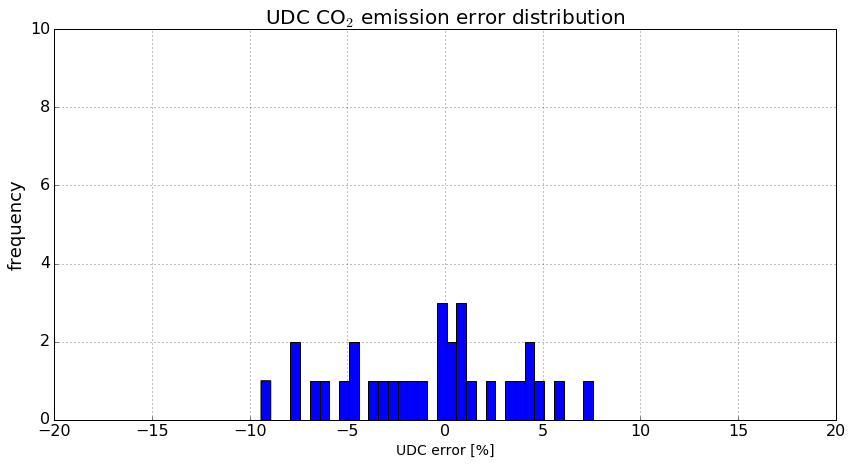

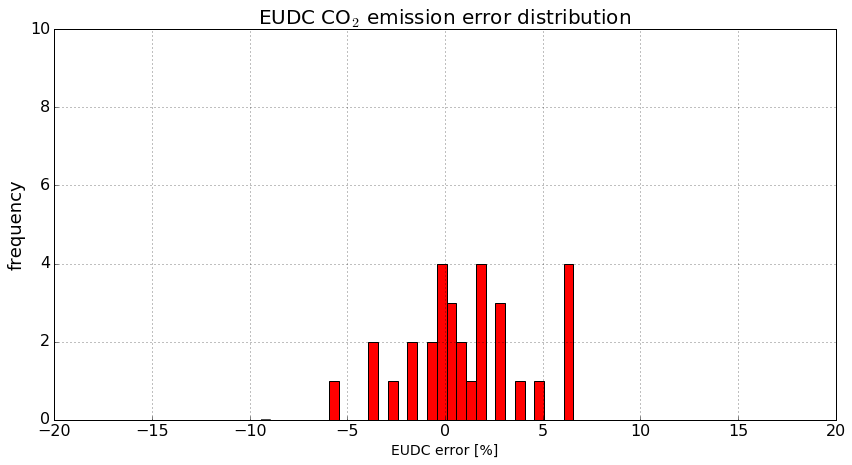

In [12]:
mydict = ([('NEDC', 0), ('UDC', 1), ('EUDC', 2)])
mydict = collections.OrderedDict(mydict)
for cycle in mydict:
    if cycle == 'NEDC':
        boxcolor = 'green'
    elif cycle == 'UDC':
        boxcolor = 'blue'
    else:
        boxcolor = 'red'
    # Create a figure instance
    fig = plt.figure(1, figsize=(14, 7))
    # Create an axes instance
    ax = fig.add_subplot(111)
    hist = valuesDF[cycle+' error [%]'].hist(bins=np.arange(min(valuesDF['UDC error [%]']), max(valuesDF['UDC error [%]']) + 0.5, 0.5), color=boxcolor)
    hist.set_xlabel(cycle+" error [%]",fontsize=14)
    hist.set_ylabel("frequency",fontsize=14)
    hist.set_ylim(0,10)
    plt.title(cycle+' CO$_2$ emission error distribution', fontsize=20)
    plt.ylabel("frequency",fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.tick_params(axis='y', which='major', labelsize=16)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlim(-20, 20)
    plt.show()

Comparative emission error per driving cycle (gCO$_2$ km$^{-1}$)

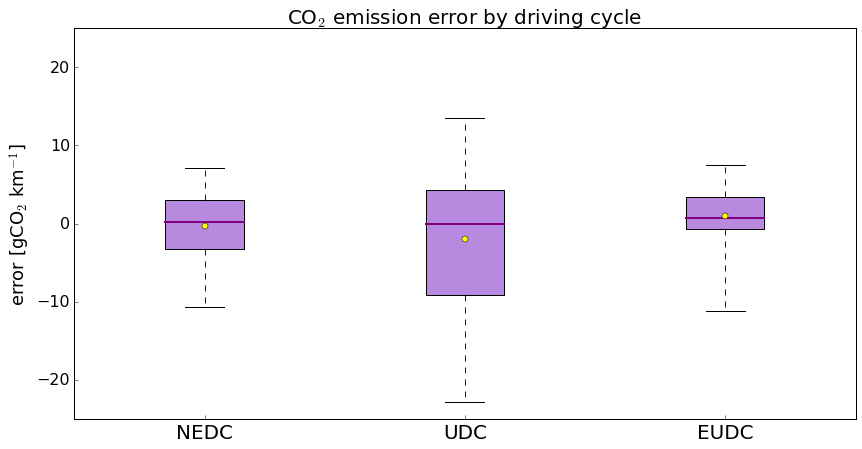

The purple box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.


In [13]:
#Alternatively show boxplots
toboxplot = [fvaluesDF.dNEDC,fvaluesDF.dUDC,fvaluesDF.dEUDC]
# Create a figure instance
fig = plt.figure(1, figsize=(14, 7))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot with fill color
bp = ax.boxplot(toboxplot, sym='', patch_artist=True, whis=10000, showmeans=True, meanprops=(dict(marker='o',markerfacecolor='yellow')))
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
    # change fill color
    box.set( facecolor = '#b78adf' )
    ## Custom x-axis labels
ax.set_xticklabels(['NEDC', 'UDC', 'EUDC'],fontsize=20)
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#Set y axis title
plt.title('CO$_2$ emission error by driving cycle', fontsize=20)
plt.ylabel("error [gCO$_2$ km$^{-1}$]",fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.set_ylim(-25, 25)
plt.setp(bp['medians'], color = 'purple', linewidth = 2)
plt.show()
print('The purple box represents the 1st and 3rd quartile.\nThe dark purple line is the median.\nThe yellow dot is the mean.\nthe whiskers show the min and max values.')

### Error statistics for engine parameters (NEDC prediction)

In [14]:
#Gather and name the engine parameters used in the report according to their name in the CO2MPAS output file
param_a = df['nedc']['prediction']['co2_params a']
param_a2 = df['nedc']['prediction']['co2_params a2']
param_b = df['nedc']['prediction']['co2_params b']
param_c = df['nedc']['prediction']['co2_params c']
param_l = df['nedc']['prediction']['co2_params l']
param_l2 = df['nedc']['prediction']['co2_params l2']
param_t0 = df['nedc']['prediction']['co2_params t0']
param_t1 = df['nedc']['prediction']['co2_params t1']
param_trg = df['nedc']['prediction']['co2_params trg']
#Create a dataframe with this data
paramsDF = pd.DataFrame({'param a': param_a,'param a2':param_a2, 'param b':param_b,'param c': param_c,'param l':param_l, 'param l2':param_l2,'param t0': param_t0,'param t1': param_t1,'param trg':param_trg,'NEDC':NEDC,'NEDC error':NEDC-NEDCt})                 
paramsDF = paramsDF.dropna()
#print the basic automatic statistics
#paramsDF.describe()
paramsDFstat = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['param a','param a2', 'param b','param c', 'param l', 'param l2', 'param t0','param t1', 'param trg'])
paramsDFstat.loc['Averages'] = pd.Series({'param a':round(paramsDF['param a'].mean(),3), 'param a2':round(paramsDF['param a2'].mean(),3), 'param b':round(paramsDF['param b'].mean(),3),'param c':round(paramsDF['param c'].mean(),3),'param l':round(paramsDF['param l'].mean(),3),'param l2':round(paramsDF['param l2'].mean(),3),'param t0':round(paramsDF['param t0'].mean(),3),'param t1':round(paramsDF['param t1'].mean(),3),'param trg':round(paramsDF['param trg'].mean(),3)})
paramsDFstat.loc['StdError'] = pd.Series({'param a':round(paramsDF['param a'].sem(),3), 'param a2':round(paramsDF['param a2'].sem(),3), 'param b':round(paramsDF['param b'].sem(),3),'param c':round(paramsDF['param c'].sem(),3),'param l':round(paramsDF['param l'].sem(),3),'param l2':round(paramsDF['param l2'].sem(),3),'param t0':round(paramsDF['param t0'].sem(),3),'param t1':round(paramsDF['param t1'].sem(),3),'param trg':round(paramsDF['param trg'].sem(),3)})
paramsDFstat.loc['Median'] = pd.Series({'param a':round(paramsDF['param a'].median(),3), 'param a2':round(paramsDF['param a2'].median(),3), 'param b':round(paramsDF['param b'].median(),3),'param c':round(paramsDF['param c'].median(),3),'param l':round(paramsDF['param l'].median(),3),'param l2':round(paramsDF['param l2'].median(),3),'param t0':round(paramsDF['param t0'].median(),3),'param t1':round(paramsDF['param t1'].median(),3),'param trg':round(paramsDF['param trg'].median(),3)})
#paramsDFstat.loc['Mode'] = pd.Series({'param a':round(paramsDF['param a'].mode().iloc[0],3), 'param a2':round(paramsDF['param a2'].mode().iloc[0],3), 'param b':round(paramsDF['param b'].mode().iloc[0],3),'param c':round(paramsDF['param c'].mode().iloc[0],3),'param l':round(paramsDF['param l'].mode().iloc[0],3),'param l2':round(paramsDF['param l2'].mode().iloc[0],3),'param t0':round(paramsDF['param t0'].mode().iloc[0],3),'param t1':round(paramsDF['param t1'].mode().iloc[0],3),'param trg':round(paramsDF['param trg'].mode().iloc[0],3)})
paramsDFstat.loc['StdDev'] = pd.Series({'param a':round(paramsDF['param a'].std(),3), 'param a2':round(paramsDF['param a2'].std(),3), 'param b':round(paramsDF['param b'].std(),3),'param c':round(paramsDF['param c'].std(),3),'param l':round(paramsDF['param l'].std(),3),'param l2':round(paramsDF['param l2'].std(),3),'param t0':round(paramsDF['param t0'].std(),3),'param t1':round(paramsDF['param t1'].std(),3),'param trg':round(paramsDF['param trg'].std(),3)})
paramsDFstat.loc['Variance'] = pd.Series({'param a':round(paramsDF['param a'].var(),3), 'param a2':round(paramsDF['param a2'].var(),3), 'param b':round(paramsDF['param b'].var(),3),'param c':round(paramsDF['param c'].var(),3),'param l':round(paramsDF['param l'].var(),3),'param l2':round(paramsDF['param l2'].var(),3),'param t0':round(paramsDF['param t0'].var(),3),'param t1':round(paramsDF['param t1'].var(),3),'param trg':round(paramsDF['param trg'].var(),3)})
paramsDFstat.loc['Kurtosis'] = pd.Series({'param a':round(paramsDF['param a'].kurtosis(),3), 'param a2':round(paramsDF['param a2'].kurtosis(),3), 'param b':round(paramsDF['param b'].kurtosis(),3),'param c':round(paramsDF['param c'].kurtosis(),3),'param l':round(paramsDF['param l'].kurtosis(),3),'param l2':round(paramsDF['param l2'].kurtosis(),3),'param t0':round(paramsDF['param t0'].kurtosis(),3),'param t1':round(paramsDF['param t1'].kurtosis(),3),'param trg':round(paramsDF['param trg'].kurtosis(),3)})
paramsDFstat.loc['Skweness'] = pd.Series({'param a':round(paramsDF['param a'].skew(),3), 'param a2':round(paramsDF['param a2'].skew(),3), 'param b':round(paramsDF['param b'].skew(),3),'param c':round(paramsDF['param c'].skew(),3),'param l':round(paramsDF['param l'].skew(),3),'param l2':round(paramsDF['param l2'].skew(),3),'param t0':round(paramsDF['param t0'].skew(),3),'param t1':round(paramsDF['param t1'].skew(),3),'param trg':round(paramsDF['param trg'].skew(),3)})
paramsDFstat.loc['Range'] = pd.Series({'param a':round((paramsDF['param a'].max()-paramsDF['param a'].min()),3), 'param a2':round((paramsDF['param a2'].max()-paramsDF['param a2'].min()),3), 'param b':round((paramsDF['param b'].max()-paramsDF['param b'].min()),3),'param c':round((paramsDF['param c'].max()-paramsDF['param c'].min()),3),'param l':round((paramsDF['param l'].max()-paramsDF['param l'].min()),3),'param l2':round((paramsDF['param l2'].max()-paramsDF['param l2'].min()),3),'param t0':round((paramsDF['param t0'].max()-paramsDF['param t0'].min()),3),'param t1':round((paramsDF['param t1'].max()-paramsDF['param t1'].min()),3),'param trg':round((paramsDF['param trg'].max()-paramsDF['param trg'].min()),3)})
paramsDFstat.loc['Minimum'] = pd.Series({'param a':round(paramsDF['param a'].min(),3), 'param a2':round(paramsDF['param a2'].min(),3), 'param b':round(paramsDF['param b'].min(),3),'param c':round(paramsDF['param c'].min(),3),'param l':round(paramsDF['param l'].min(),3),'param l2':round(paramsDF['param l2'].min(),3),'param t0':round(paramsDF['param t0'].min(),3),'param t1':round(paramsDF['param t1'].min(),3),'param trg':round(paramsDF['param trg'].min(),3)})
paramsDFstat.loc['Maximum'] = pd.Series({'param a':round(paramsDF['param a'].max(),3), 'param a2':round(paramsDF['param a2'].max(),3), 'param b':round(paramsDF['param b'].max(),3),'param c':round(paramsDF['param c'].max(),3),'param l':round(paramsDF['param l'].max(),3),'param l2':round(paramsDF['param l2'].max(),3),'param t0':round(paramsDF['param t0'].max(),3),'param t1':round(paramsDF['param t1'].max(),3),'param trg':round(paramsDF['param trg'].max(),3)})
paramsDFstat.loc['Sum'] = pd.Series({'param a':round(paramsDF['param a'].sum(),3), 'param a2':round(paramsDF['param a2'].sum(),3), 'param b':round(paramsDF['param b'].sum(),3),'param c':round(paramsDF['param c'].sum(),3),'param l':round(paramsDF['param l'].sum(),3),'param l2':round(paramsDF['param l2'].sum(),3),'param t0':round(paramsDF['param t0'].sum(),3),'param t1':round(paramsDF['param t1'].sum(),3),'param trg':round(paramsDF['param trg'].sum(),3)})
paramsDFstat.loc['Count'] = pd.Series({'param a':round(paramsDF['param a'].count(),3), 'param a2':round(paramsDF['param a2'].count(),3), 'param b':round(paramsDF['param b'].count(),3),'param c':round(paramsDF['param c'].count(),3),'param l':round(paramsDF['param l'].count(),3),'param l2':round(paramsDF['param l2'].count(),3),'param t0':round(paramsDF['param t0'].count(),3),'param t1':round(paramsDF['param t1'].count(),3),'param trg':round(paramsDF['param trg'].count(),3)})
paramsDFstat.loc['Confidence level (95%)'] = pd.Series({'param a':2*round(paramsDF['param a'].sem(),3), 'param a2':2*round(paramsDF['param a2'].sem(),3), 'param b':2*round(paramsDF['param b'].sem(),3),'param c':2*round(paramsDF['param c'].sem(),3),'param l':2*round(paramsDF['param l'].sem(),3),'param l2':2*round(paramsDF['param l2'].sem(),3),'param t0':2*round(paramsDF['param t0'].sem(),3),'param t1':2*round(paramsDF['param t1'].sem(),3),'param trg':2*round(paramsDF['param trg'].sem(),3)})
paramsDFstat

,param a,param a2,param b,param c,param l,param l2,param t0,param t1,param trg
Averages,0.396,-0.002,0.022,-0.001,-2.013,-0.005,2.604,2.677,89.344
StdError,0.015,0,0.002,0,0.085,0.001,0.221,0.23,1.234
Median,0.408,-0.002,0.019,-0.001,-2.157,-0.003,2.842,3.25,88.84
Mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StdDev,0.085,0.001,0.009,0.001,0.476,0.004,1.229,1.283,6.873
Variance,0.007,0,0,0,0.226,0,1.51,1.646,47.236
Kurtosis,7.567,-0.196,-0.693,-1.521,-2.027,-0.095,1.556,2.189,0.515
Skweness,-1.9,-0.491,0.326,-0.037,-0.009,0.13,-0.774,-1.537,0.513
Range,0.51,0.004,0.038,0.003,1.185,0.019,6.132,5.315,30.101
Minimum,0.06,-0.004,0.006,-0.003,-2.571,-0.013,-1.075,-1.008,77.1


Error statistics for engine parameters applying a filtering of NEDC absolute error < 25 gCO$_2$ km$^{-1}$

In [15]:
#filter for absolute errors above 25g CO2 per km
fparamsDF = paramsDF[abs(paramsDF['NEDC error']) < 25]
#fparamsDFstat = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['param a','param a2', 'param b', 'param l', 'param l2', 'param t0','param t1', 'param trg'])
fparamsDFstat = pd.DataFrame(index=['Averages','StdError','Median','Mode','StdDev','Variance','Kurtosis','Skweness','Range','Minimum','Maximum','Sum','Count','Confidence level (95%)'], columns=['param a','param a2', 'param b', 'param l', 'param l2', 'param t0', 'param trg'])
fparamsDFstat.loc['Averages'] = pd.Series({'param a':round(fparamsDF['param a'].mean(),3), 'param a2':round(fparamsDF['param a2'].mean(),3), 'param b':round(fparamsDF['param b'].mean(),3),'param l':round(fparamsDF['param l'].mean(),3),'param l2':round(fparamsDF['param l2'].mean(),3),'param t0':round(fparamsDF['param t0'].mean(),3),'param trg':round(fparamsDF['param trg'].mean(),3)})
fparamsDFstat.loc['StdError'] = pd.Series({'param a':round(fparamsDF['param a'].sem(),3), 'param a2':round(fparamsDF['param a2'].sem(),3), 'param b':round(fparamsDF['param b'].sem(),3),'param l':round(fparamsDF['param l'].sem(),3),'param l2':round(fparamsDF['param l2'].sem(),3),'param t0':round(fparamsDF['param t0'].sem(),3),'param trg':round(fparamsDF['param trg'].sem(),3)})
fparamsDFstat.loc['Median'] = pd.Series({'param a':round(fparamsDF['param a'].median(),3), 'param a2':round(fparamsDF['param a2'].median(),3), 'param b':round(fparamsDF['param b'].median(),3),'param l':round(fparamsDF['param l'].median(),3),'param l2':round(fparamsDF['param l2'].median(),3),'param t0':round(fparamsDF['param t0'].median(),3),'param trg':round(fparamsDF['param trg'].median(),3)})
#fparamsDFstat.loc['Mode'] = pd.Series({'param a':round(fparamsDF['param a'].mode().iloc[0],3), 'param a2':round(fparamsDF['param a2'].mode().iloc[0],3), 'param b':round(fparamsDF['param b'].mode().iloc[0],3),'param l':round(fparamsDF['param l'].mode().iloc[0],3),'param l2':round(fparamsDF['param l2'].mode().iloc[0],3),'param t0':round(fparamsDF['param t0'].mode().iloc[0],3),'param trg':round(fparamsDF['param trg'].mode().iloc[0],3)})
fparamsDFstat.loc['StdDev'] = pd.Series({'param a':round(fparamsDF['param a'].std(),3), 'param a2':round(fparamsDF['param a2'].std(),3), 'param b':round(fparamsDF['param b'].std(),3),'param l':round(fparamsDF['param l'].std(),3),'param l2':round(fparamsDF['param l2'].std(),3),'param t':round(fparamsDF['param t0'].std(),3),'param trg':round(fparamsDF['param trg'].std(),3)})
fparamsDFstat.loc['Variance'] = pd.Series({'param a':round(fparamsDF['param a'].var(),3), 'param a2':round(fparamsDF['param a2'].var(),3), 'param b':round(fparamsDF['param b'].var(),3),'param l':round(fparamsDF['param l'].var(),3),'param l2':round(fparamsDF['param l2'].var(),3),'param t0':round(fparamsDF['param t0'].var(),3),'param trg':round(fparamsDF['param trg'].var(),3)})
fparamsDFstat.loc['Kurtosis'] = pd.Series({'param a':round(fparamsDF['param a'].kurtosis(),3), 'param a2':round(fparamsDF['param a2'].kurtosis(),3), 'param b':round(fparamsDF['param b'].kurtosis(),3),'param l':round(fparamsDF['param l'].kurtosis(),3),'param l2':round(fparamsDF['param l2'].kurtosis(),3),'param t0':round(fparamsDF['param t0'].kurtosis(),3),'param trg':round(fparamsDF['param trg'].kurtosis(),3)})
fparamsDFstat.loc['Skweness'] = pd.Series({'param a':round(fparamsDF['param a'].skew(),3), 'param a2':round(fparamsDF['param a2'].skew(),3), 'param b':round(fparamsDF['param b'].skew(),3),'param l':round(fparamsDF['param l'].skew(),3),'param l2':round(fparamsDF['param l2'].skew(),3),'param t0':round(fparamsDF['param t0'].skew(),3),'param trg':round(fparamsDF['param trg'].skew(),3)})
fparamsDFstat.loc['Range'] = pd.Series({'param a':round((fparamsDF['param a'].max()-paramsDF['param a'].min()),3), 'param a2':round((fparamsDF['param a2'].max()-paramsDF['param a2'].min()),3), 'param b':round((fparamsDF['param b'].max()-paramsDF['param b'].min()),3),'param l':round((fparamsDF['param l'].max()-paramsDF['param l'].min()),3),'param l2':round((fparamsDF['param l2'].max()-paramsDF['param l2'].min()),3),'param t0':round((fparamsDF['param t0'].max()-paramsDF['param t0'].min()),3),'param trg':round((fparamsDF['param trg'].max()-paramsDF['param trg'].min()),3)})
fparamsDFstat.loc['Minimum'] = pd.Series({'param a':round(fparamsDF['param a'].min(),3), 'param a2':round(fparamsDF['param a2'].min(),3), 'param b':round(fparamsDF['param b'].min(),3),'param l':round(fparamsDF['param l'].min(),3),'param l2':round(fparamsDF['param l2'].min(),3),'param t0':round(fparamsDF['param t0'].min(),3),'param trg':round(fparamsDF['param trg'].min(),3)})
fparamsDFstat.loc['Maximum'] = pd.Series({'param a':round(fparamsDF['param a'].max(),3), 'param a2':round(fparamsDF['param a2'].max(),3), 'param b':round(fparamsDF['param b'].max(),3),'param l':round(fparamsDF['param l'].max(),3),'param l2':round(fparamsDF['param l2'].max(),3),'param t0':round(fparamsDF['param t0'].max(),3),'param trg':round(fparamsDF['param trg'].max(),3)})
fparamsDFstat.loc['Sum'] = pd.Series({'param a':round(fparamsDF['param a'].sum(),3), 'param a2':round(fparamsDF['param a2'].sum(),3), 'param b':round(fparamsDF['param b'].sum(),3),'param l':round(fparamsDF['param l'].sum(),3),'param l2':round(fparamsDF['param l2'].sum(),3),'param t0':round(fparamsDF['param t0'].sum(),3),'param trg':round(fparamsDF['param trg'].sum(),3)})
fparamsDFstat.loc['Count'] = pd.Series({'param a':round(fparamsDF['param a'].count(),3), 'param a2':round(fparamsDF['param a2'].count(),3), 'param b':round(fparamsDF['param b'].count(),3),'param l':round(fparamsDF['param l'].count(),3),'param l2':round(fparamsDF['param l2'].count(),3),'param t0':round(fparamsDF['param t0'].count(),3),'param trg':round(fparamsDF['param trg'].count(),3)})
fparamsDFstat.loc['Confidence level (95%)'] = pd.Series({'param a':2*round(fparamsDF['param a'].sem(),3), 'param a2':2*round(fparamsDF['param a2'].sem(),3), 'param b':2*round(fparamsDF['param b'].sem(),3),'param l':2*round(fparamsDF['param l'].sem(),3),'param l2':2*round(fparamsDF['param l2'].sem(),3),'param t0':2*round(fparamsDF['param t0'].sem(),3),'param trg':2*round(fparamsDF['param trg'].sem(),3)})
if (len(paramsDF['NEDC error'])-len(fparamsDF['NEDC error'])) == 0:
    print('No filtering needed, same statistics as above')
else:
    print('Filtered statistics')
    display(fparamsDFstat)

No filtering needed, same statistics as above


Distribution of the engine parameters values for filtered cases

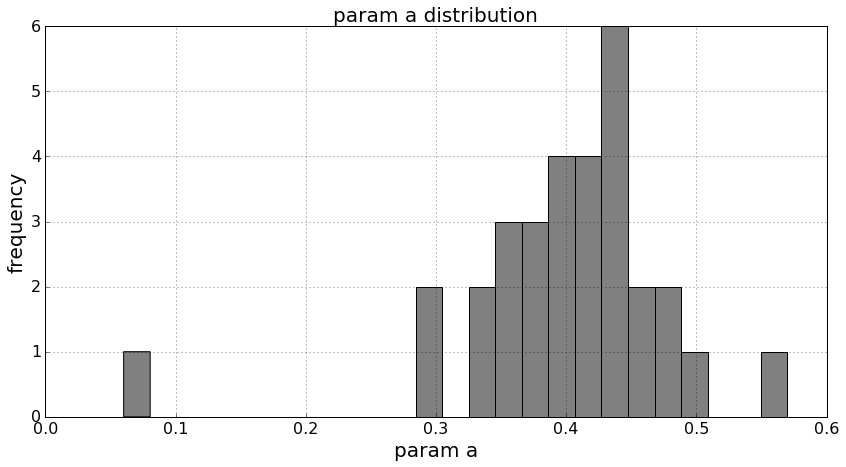

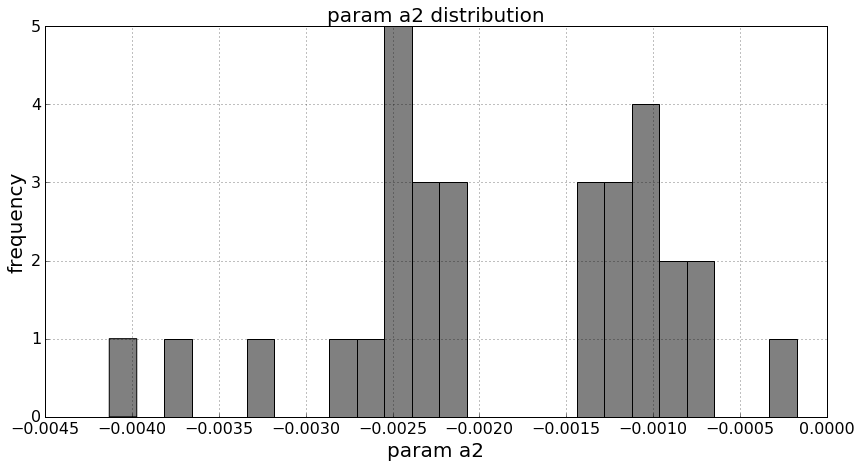

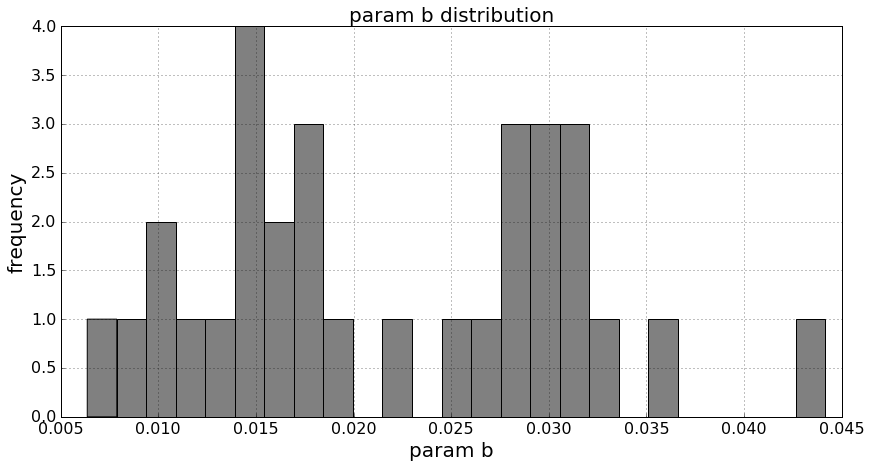

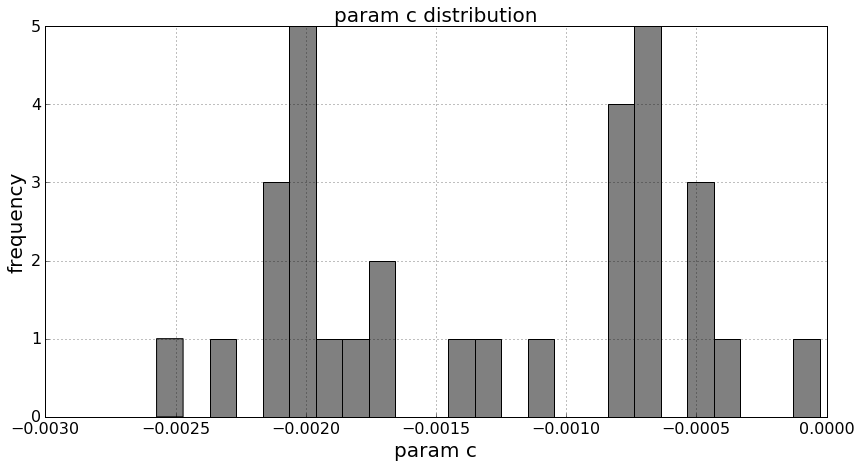

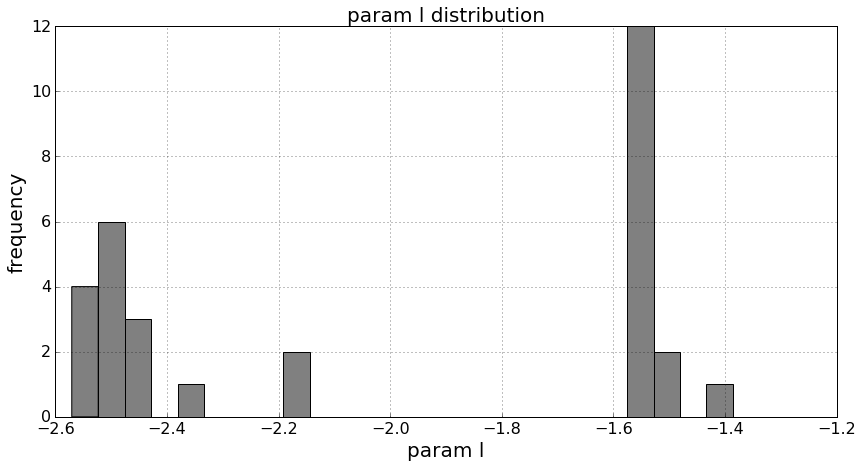

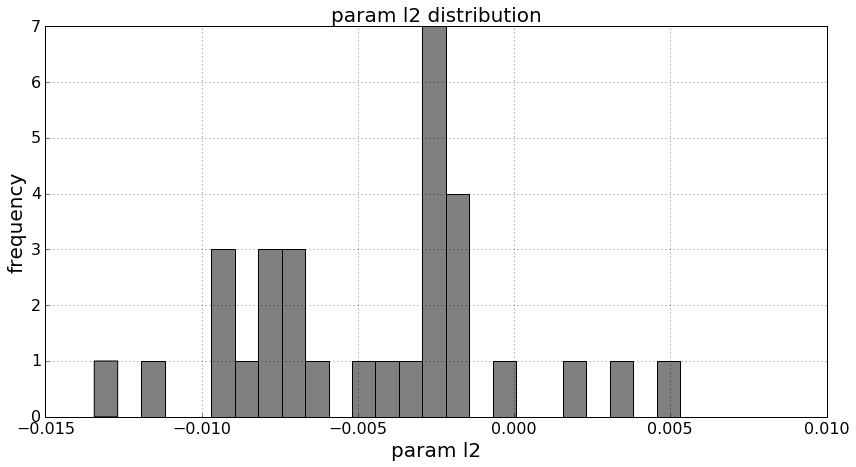

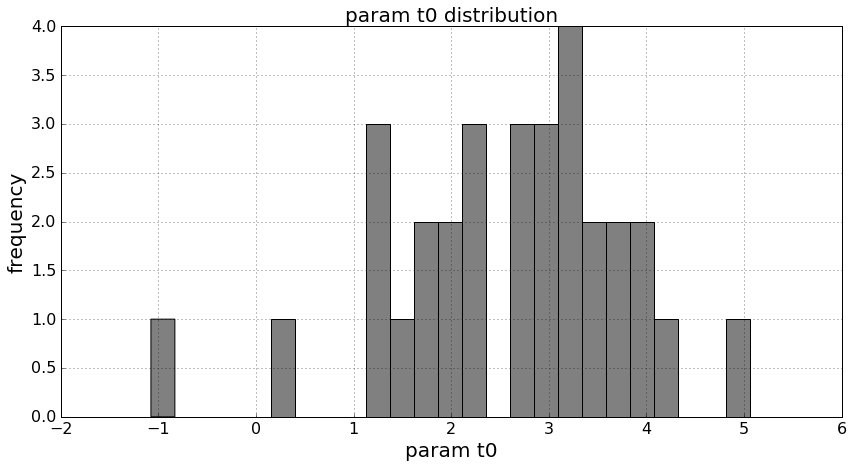

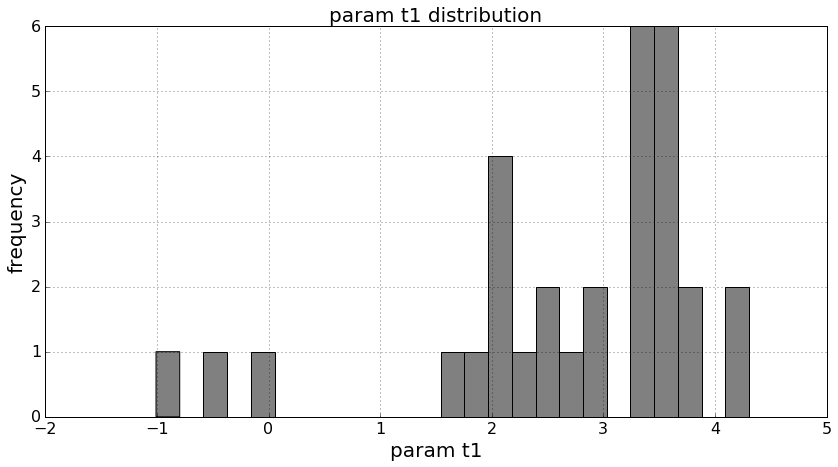

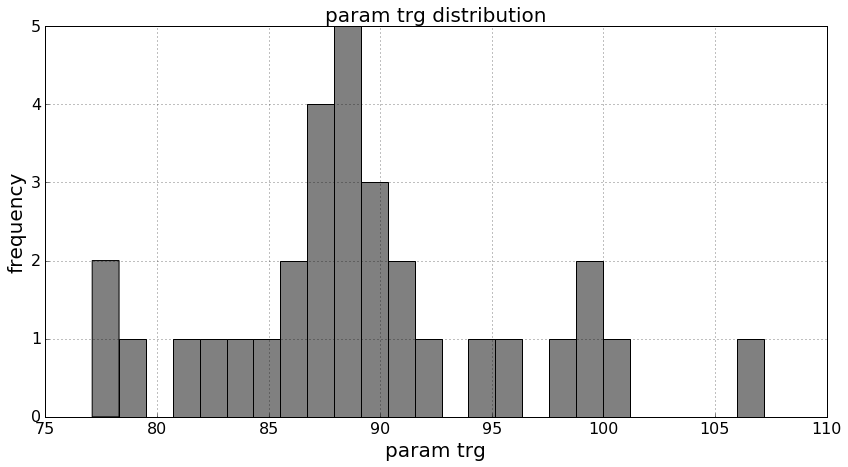

In [16]:
#Histogram for each engine parameter
#create a list with all the available engine parameters
paramlist = list(sorted(fparamsDF.columns.unique()))
for p in range(2,(len(paramlist))):
    tit = paramlist[p] + ' distribution'
    fig = plt.figure(1, figsize=(14, 7))
    plt.title(tit,fontsize=20)
    plot = fig.add_subplot(111)
    # We change the fontsize of minor ticks label 
    plot.tick_params(axis='x', which='major', labelsize=16)
    plot.tick_params(axis='y', which='major', labelsize=16)
    par_hist = fparamsDF[paramlist[p]].hist(bins=25, color='grey')
    par_hist.set_xlabel(paramlist[p],fontsize=20)
    par_hist.set_ylabel("frequency",fontsize=20)
    plot.get_xaxis().tick_bottom()
    plot.get_yaxis().tick_left()
    plt.show()

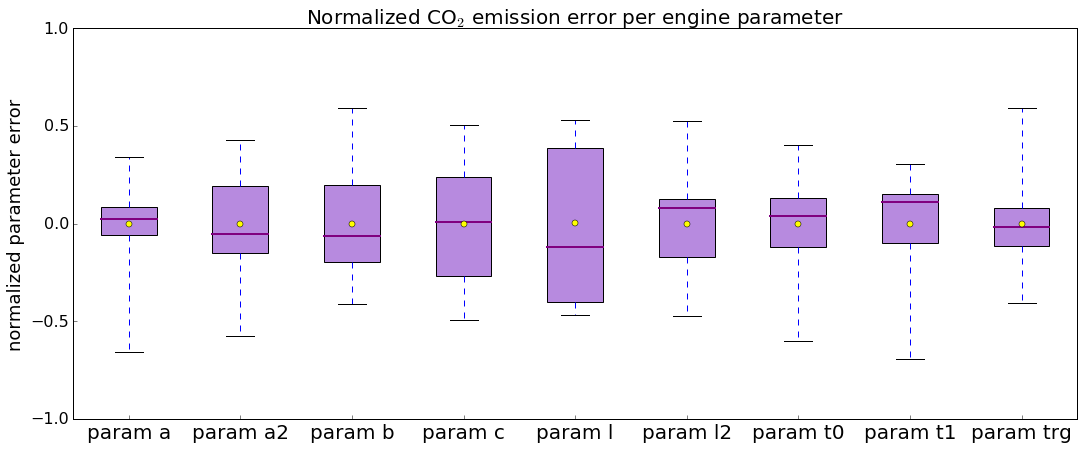

The purple box represents the 1st and 3rd quartile.
The dark purple line is the median.
The yellow dot is the mean.
the whiskers show the min and max values.


In [17]:
#Alternatively show normalized error boxplot for all engine parameters
paramsbp = fparamsDF.drop(fparamsDF.columns[[0,1]], axis = 1)
paramsbp_norm = (paramsbp - paramsbp.mean()) / (paramsbp.max() - paramsbp.min())
# Create a figure instance
fig = plt.figure(1, figsize=(18, 7))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot with fill color
bp = ax.boxplot(paramsbp_norm.values, sym='', patch_artist=True, whis=10000, showmeans=True, meanprops=(dict(marker='o',markerfacecolor='yellow')))
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=1)
    # change fill color
    box.set( facecolor = '#b78adf' )
## Custom x-axis labels
ax.set_xticklabels(['param a', 'param a2', 'param b', 'param c', 'param l', 'param l2', 'param t0','param t1', 'param trg'],fontsize=20)
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#Set y axis title
plt.title('Normalized CO$_2$ emission error per engine parameter', fontsize=20)
plt.ylabel("normalized parameter error",fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16)
ax.set_ylim(-1, 1)
plt.setp(bp['medians'], color = 'purple', linewidth = 2)
plt.show()
print('The purple box represents the 1st and 3rd quartile.\nThe dark purple line is the median.\nThe yellow dot is the mean.\nthe whiskers show the min and max values.')

Correlation between all engine parameters and NEDC error. All vehicles

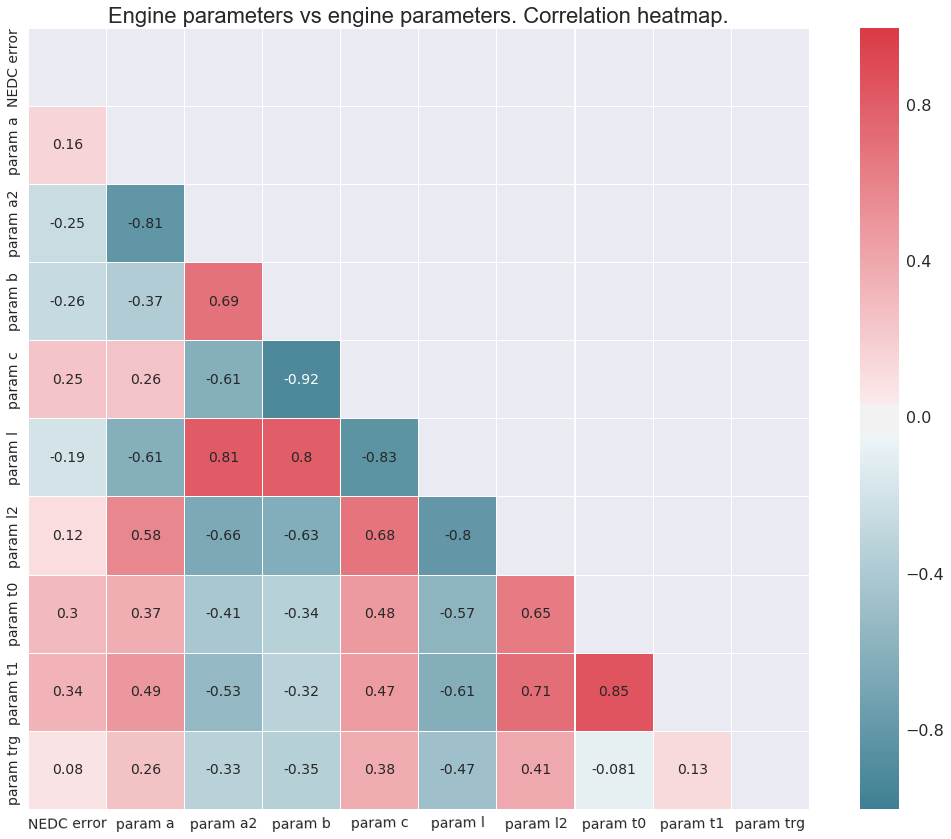

In [18]:
#Create a heatmap with the correlation of all the engine parameters and the NEDC error
fparamNEDCerror = fparamsDF.drop('NEDC', 1)
#from seaborn.apionly import heatmap, diverging_palette
import seaborn as sns
sns.set()
# Compute the correlation matrix
corr = fparamNEDCerror.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center = 0, linewidths=.1,  annot = True, annot_kws={"size":14}, square = True)
plt.title('Engine parameters vs engine parameters. Correlation heatmap.',fontsize=22)
plt.yticks(fontsize = 14) 
plt.xticks(fontsize = 14, rotation = 1)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16)
plt.show()

In [19]:
#Avoid using seaborn templates and go back to matplotlib templates
mpl.rcParams.update(inline_rc)

## Section 2. Performance of the model. Statistics per vehicle model

**NEDC**, **UDC**, and **EUDC** CO$_2$ emission error per vehicle model

Error,NEDC error [%],UDC error [%],EUDC error [%]
AlfaRomeo_Giulietta,4.74,7.10,2.65
Audi_A4,3.42,0.65,6.19
Audi_A8,-0.15,0.36,-0.63
BMW_116i,0.85,-5.05,6.47
BMW_328,-1.36,-4.47,1.79
BMW_MINIR60,-2.55,-1.27,-3.51
BMW_X1,1.75,4.72,0.04
BMW_series2,-1.00,-3.02,0.58
Crafter_N1,-1.80,-3.50,-0.40
Daimler,5.04,3.53,6.43


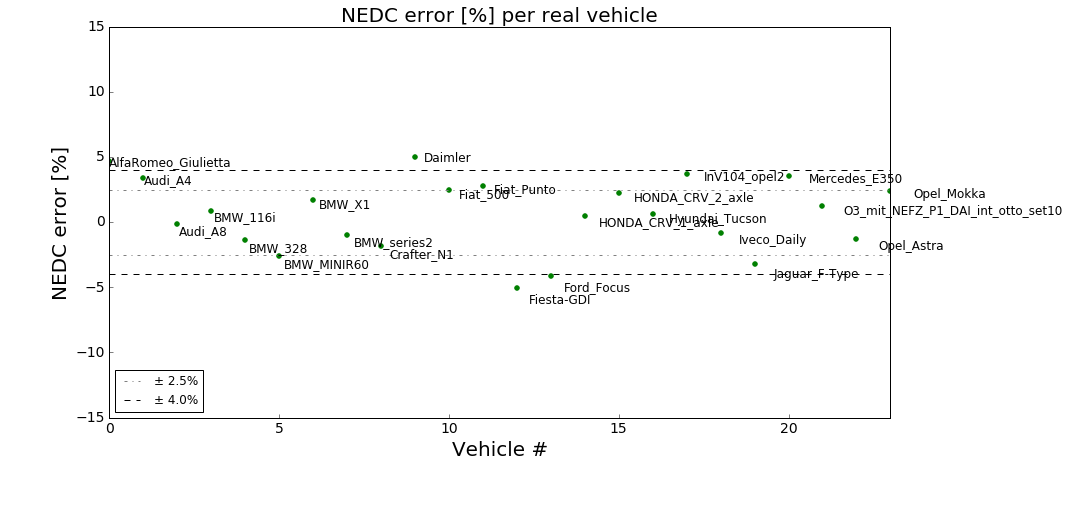

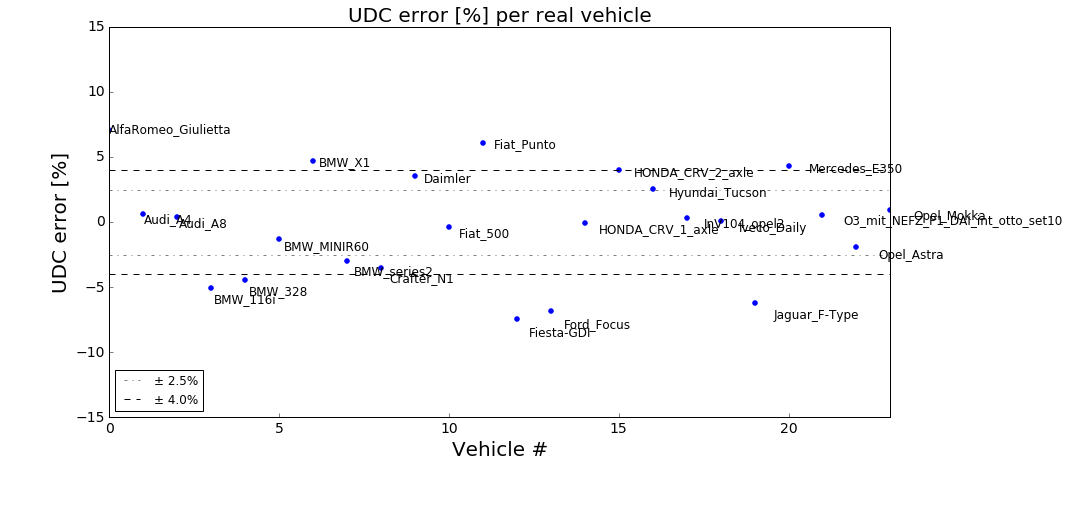

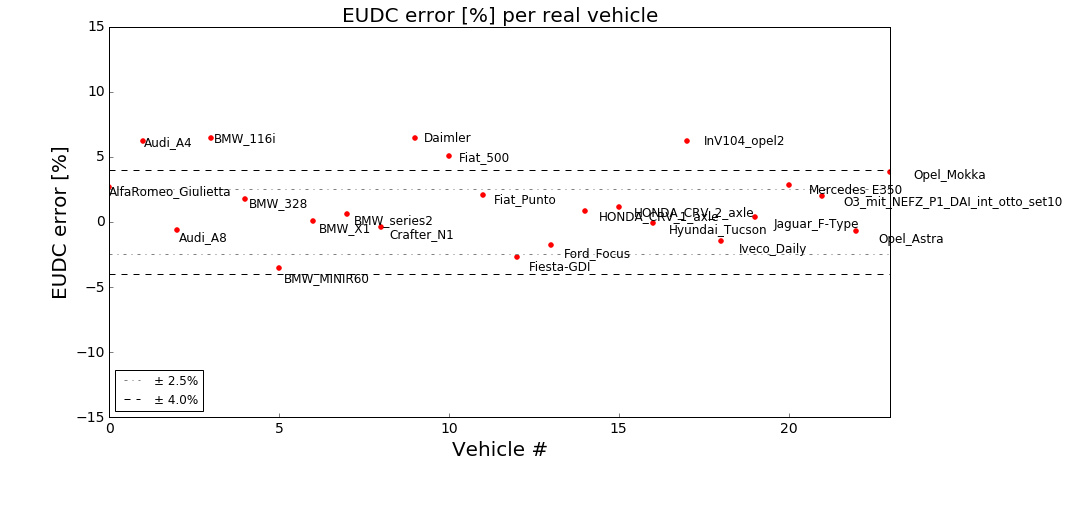

In [20]:
Carlist = list(sorted(valuesDF['Model'].unique()))
Cidlist = list(range(len(Carlist)))
valuesDF.cid = valuesDF['Model'].replace(Carlist, Cidlist, regex = True)
valuesDF['cod'] = valuesDF.cid
#Create a table with the error statistics for each car model
CarDF = pd.DataFrame(columns=['NEDC error [%]','UDC error [%]', 'EUDC error [%]'])
for x in Carlist:
    Car = valuesDF[valuesDF['Model'] == x]
    CarDF.loc[x] = pd.Series({'NEDC error [%]':round(Car['NEDC error [%]'].mean(),2), 'UDC error [%]':round(Car['UDC error [%]'].mean(),2), 'EUDC error [%]':round(Car['EUDC error [%]'].mean(),2)})
CarDF.columns.name='Error'
display(CarDF)
mydict = ([('NEDC', 0), ('UDC', 1), ('EUDC', 2)])
mydict = collections.OrderedDict(mydict)
for cycle in mydict:
    if cycle == 'NEDC':
        boxcolor = 'green'
    elif cycle == 'UDC':
        boxcolor = 'blue'
    else:
        boxcolor = 'red'
    #plot the emission error per model, and cycle
    fig = plt.figure(1, figsize=(14, 7))
    labels = ['{0}'.format(i) for i in valuesDF['Model']]
    plt.title(cycle+" error [%] per real vehicle",fontsize=20)
    plot = fig.add_subplot(111)
    plot.tick_params(axis='x', which='major', labelsize=14)
    plot.tick_params(axis='y', which='major', labelsize=14)
    plot.set_xlim(0, 23)
    plot.set_ylim(-15,15)
    plot.get_xaxis().tick_bottom()
    plot.get_yaxis().tick_left()
    #plt.scatter(valuesDF['Case'],valuesDF[cycle+' error [%]'], color=boxcolor, marker = 'o')
    plt.scatter(valuesDF['cod'],valuesDF[cycle+' error [%]'], color=boxcolor, marker = 'o')
#     for label, x, y in zip(labels, valuesDF['Case'], valuesDF[cycle+' error [%]']):
    for label, x, y in zip(labels, valuesDF['cod'], valuesDF[cycle+' error [%]']):
        plt.annotate(label, xy = (x, y), textcoords ='offset points', ha = 'left', va = 'top', size = 12)
    plot.set_xlabel("Vehicle #",fontsize=20)
    plot.set_ylabel(cycle+" error [%]",fontsize=20)
    line1 = plot.axhline(y=-2.5, color='grey', linestyle='-.', label='± 2.5%')
    line2 = plot.axhline(y=2.5, color='grey', linestyle='-.')
    line3 = plot.axhline(y=-4, color='black', linestyle='--', label='± 4.0%')
    line4 = plot.axhline(y=4, color='black', linestyle='--')
    plt.legend(handles=[line1, line3], loc = 3)
    plt.show()    